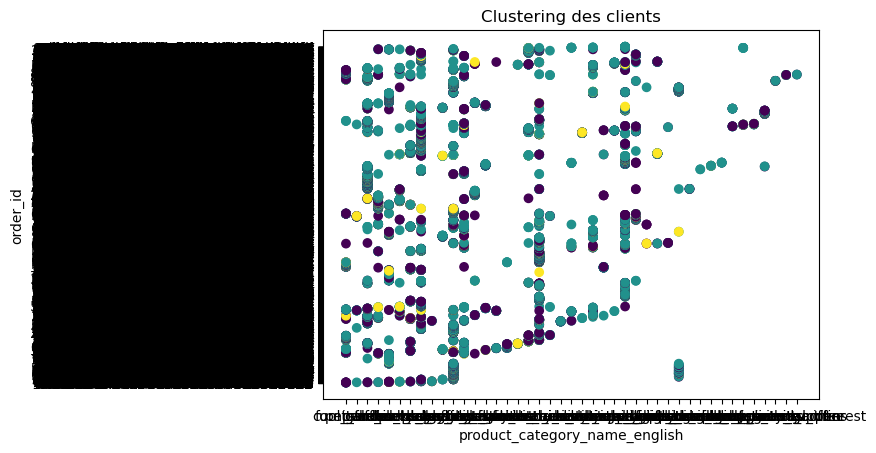

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


file1 = "data/product_category_name_translation.csv"
file2 = "data/olist_products_dataset.csv"
file3 = "data/olist_order_items_dataset.csv"


dataset1 = pd.read_csv(file1)
dataset2 = pd.read_csv(file2)
dataset3 = pd.read_csv(file3)


jointure1 = pd.merge(dataset1, dataset2, on='product_category_name', how='inner')
jointure2 = pd.merge(dataset3, jointure1, on='product_id', how='inner')


data_numeric = jointure2.select_dtypes(include=['float64', 'int64'])
data_numeric = data_numeric.dropna()

#reduction de la taille du datasets dans l'optique de reduire la charge de travail 
data_numeric = data_numeric.sample(frac=0.1, random_state=42)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)


labels = kmeans.labels_


jointure2 = jointure2.iloc[:len(labels)]  
jointure2['Cluster'] = labels


plt.scatter(jointure2['product_category_name_english'], jointure2['order_id'], c=jointure2['Cluster'], cmap='viridis')
plt.xlabel('product_category_name_english')
plt.ylabel('order_id')
plt.title('Clustering des clients')
plt.show()